<a href="https://colab.research.google.com/github/data-sci-capstone/copilot/blob/alfonso/sentimental_data_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import math
import json
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMDB dataset**

In [4]:
imdb = pd.read_csv("/content/drive/MyDrive/imdb/imdb/movie.csv")

In [5]:
imdb.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [6]:
# data types per column
imdb.dtypes

text     object
label     int64
dtype: object

<Axes: xlabel='label', ylabel='count'>

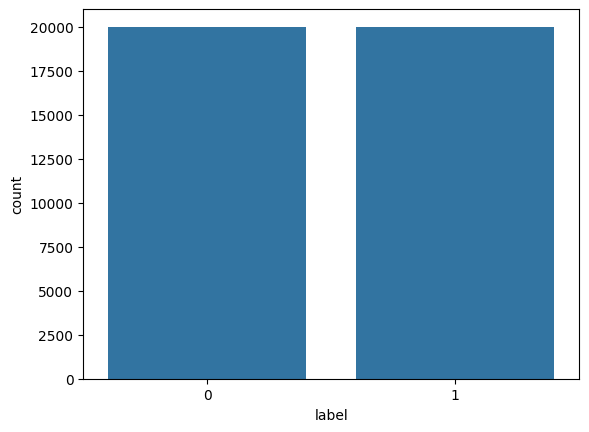

In [9]:
sns.countplot(x="label", data = imdb)

In [10]:
print(f"Labels consist of roughly {sum(imdb['label'] == 0) / len(imdb)}% negative and {sum(imdb['label'] == 1) / len(imdb)}% positive")

Labels consist of roughly 0.500475% negative and 0.499525% positive


In [11]:
print(f"Max length of a review: {imdb['text'].str.len().max()}\n\
Min length of a review: {imdb['text'].str.len().min()}")

Max length of a review: 13704
Min length of a review: 32


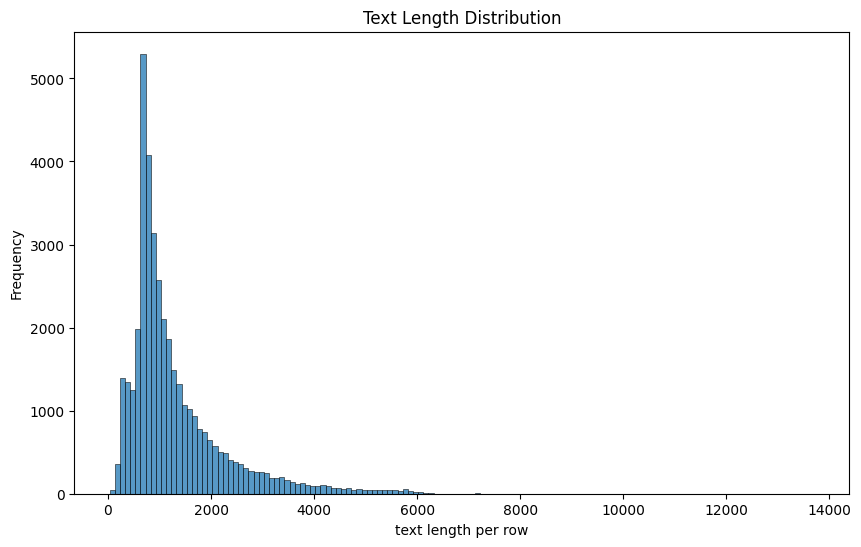

In [12]:
# Plot distribution of text length for reviews
plt.figure(figsize=(10, 6))
sns.histplot(imdb["text"].str.len(), binwidth = 100)

plt.title("Text Length Distribution")
plt.xlabel("text length per row")
plt.ylabel("Frequency")
plt.show()

**Amazon Dataset**

In [13]:
amazon_df = pd.read_csv("/content/drive/MyDrive/amazon_reviews.csv")

In [40]:
amazon_df[['reviewText', 'overall']].head()

,reviewText,overall
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0


In [38]:
non_discrete = (amazon_df['overall'] == 3.6)

In [36]:
sum(non_discrete)

0

In [15]:
amazon_df.dtypes

Unnamed: 0                int64
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

In [16]:
print(f"Total Reviews {len(amazon_df)}")

Total Reviews 4915


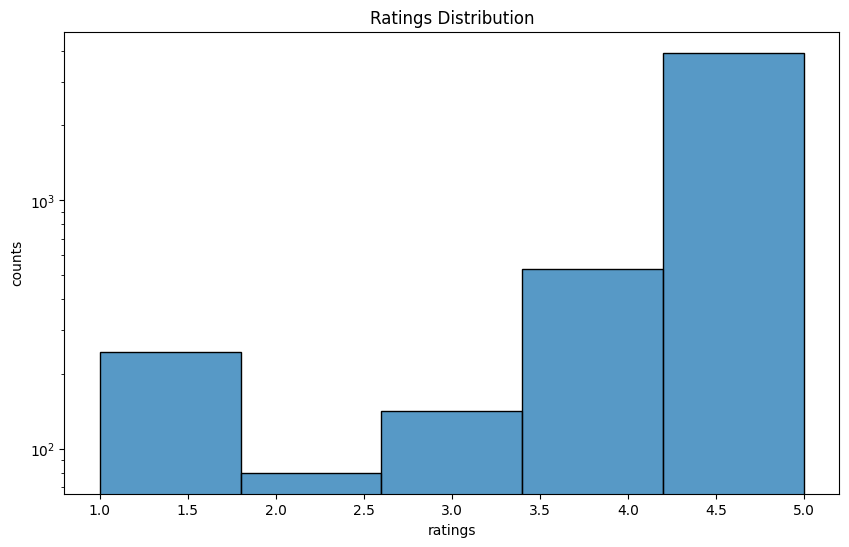

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data = amazon_df["overall"], binwidth=0.8)

plt.title("Ratings Distribution")
plt.xlabel("ratings")
plt.ylabel('counts')
plt.yscale('log')
plt.show()

In [18]:
print(f"Max length of a review: {amazon_df['reviewText'].str.len().max()}\n\
Min length of a review: {amazon_df['reviewText'].str.len().min()}")

Max length of a review: 8638.0
Min length of a review: 3.0


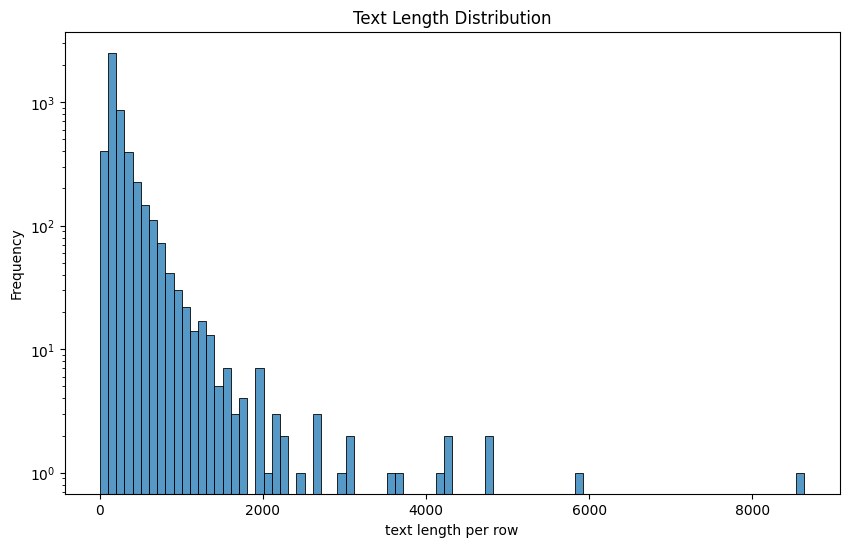

In [19]:
# Plot distribution of text length for reviews
plt.figure(figsize=(10, 6))
sns.histplot(amazon_df["reviewText"].str.len(), binwidth = 100)

plt.title("Text Length Distribution")
plt.xlabel("text length per row")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()

**Yelp Dataset**

In [ ]:
# YELP DATASET CRASHES ON COLAB OUT OF MEMORY
import pandas as pd

data = []

with open("/content/drive/MyDrive/yelp_academic_dataset_review.json", 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

yelp_df = pd.DataFrame(data)